In [42]:
# Setup imports
import sys, os, warnings
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sys.path.append('..')  # Enable importing from package ddl without installing ddl
# sys.path.append('/home/emmanuel/code/destructive-deep-learning')
from ddl.rbig import get_rbig_model, get_deep_rbig_cmodel, get_deep_rbig_model, get_rbig_cmodel, get_rbig_cvmodel
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings('ignore', category=DataConversionWarning)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def plot_scatter(data, probs=None):
    fig, ax = plt.subplots()
    if probs is not None:
        h = ax.scatter(data[:, 0], data[:, 1], s=1, c=probs)
        cbar = plt.colorbar(h)

    else:
        ax.scatter(data[:, 0], data[:, 1], s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Data')
    plt.tight_layout()

    plt.show()
    return None

def plot_histograms(data, bins=50):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax[0].set_title(r'$X$')
    ax[0].hist(data[:, 0], bins=50)
    ax[1].set_title(r'$Y$')
    ax[1].hist(data[:, 1], bins=50)
    plt.tight_layout()
    plt.show()
    
    return None

def plot_layer_scores(scores):
    
    # Score Layers
    fig, ax = plt.subplots()

    ax.plot(score_layers.cumsum())

    plt.show()
    
    return None

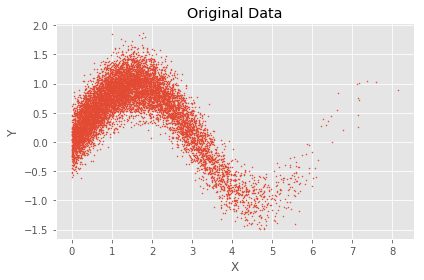

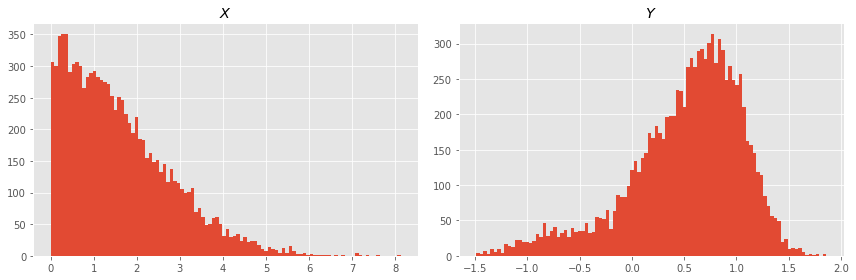

In [44]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 10000
x = np.abs(2 * rng.randn(num_samples, 1))
y = np.sin(x) + 0.25 * rng.randn(num_samples, 1)
data = np.hstack((x, y))

# Scatter Data
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original Data')
plt.tight_layout()

plt.show()

# Histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(data[:, 0], bins=100)
ax[0].set_title(r'$X$')
ax[1].hist(data[:, 1], bins=100)
ax[1].set_title(r'$Y$')
plt.tight_layout()
plt.show()

### Deep RBIG (Shallow RBIG) (1 Layer)

Score: 0.712226802820201


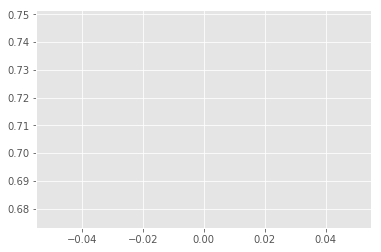

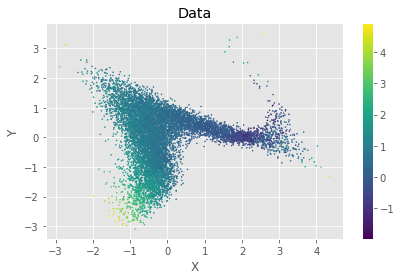

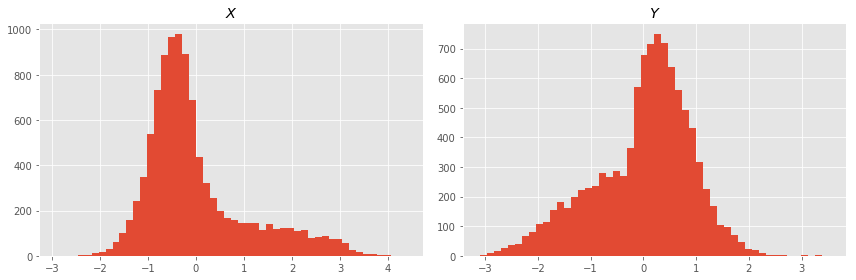

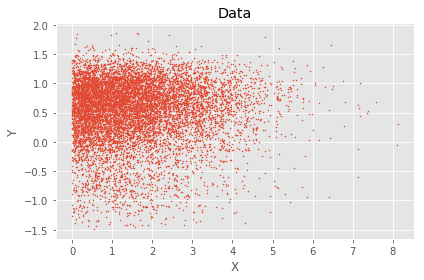

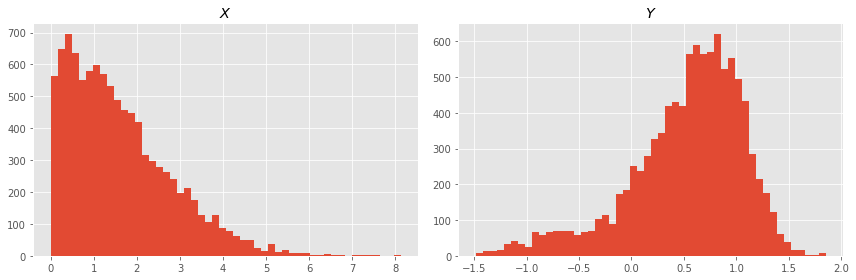

In [46]:
# Get RBIG model
n_layers = 1
bins = 200
bounds = 0.1
alpha = 1e-10
random_state = 123

deep_rbig_model = get_deep_rbig_model(
    n_layers=n_layers,
    bins=bins, alpha=alpha, bounds=bounds,
    random_state=random_state
)

deep_rbig_model.fit(data);


# Get Scores
# data_samples = deep_rbig_model.sample(100, random_state=123)
score = deep_rbig_model.score(data)
score_layers = deep_rbig_model.score_layers(data)
probs = deep_rbig_model.score_samples(data)
print('Score:', score)

plot_layer_scores(score_layers)

# Data in Gaussian Domain
Z_approx = deep_rbig_model.transform(data)

plot_scatter(Z_approx, probs)

plot_histograms(Z_approx)


# Generate Samples in Data Domain
G = np.random.randn(10000, 2)
data_approx = deep_rbig_model.inverse_transform(G)

plot_scatter(data_approx)

plot_histograms(data_approx)

## Deep RBIG Model

Score: 1.74694408273987


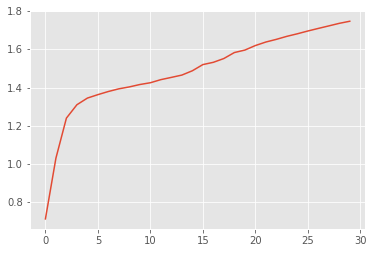

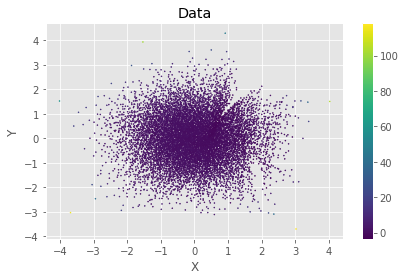

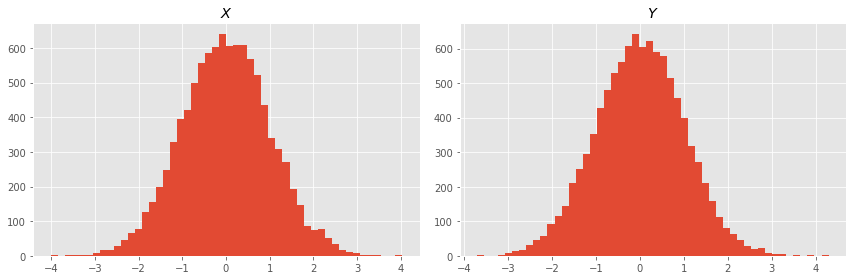

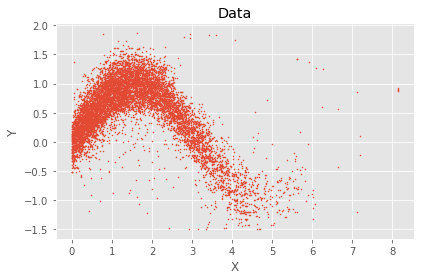

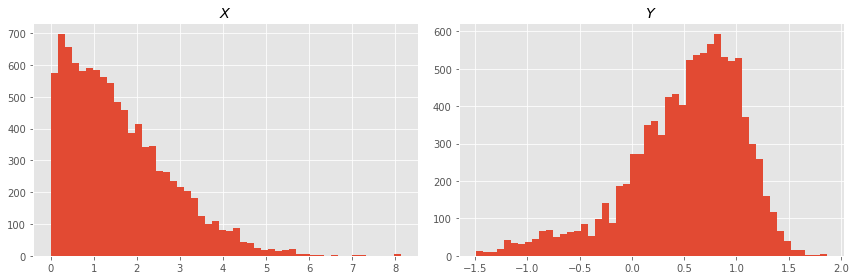

In [47]:
# Get RBIG model
n_layers = 30
bins = 200
bounds = 0.1
alpha = 1e-10
random_state = 123

deep_rbig_model = get_deep_rbig_model(
    n_layers=n_layers,
    bins=bins, alpha=alpha, bounds=bounds,
    random_state=random_state
)

deep_rbig_model.fit(data);



# Get Scores
# data_samples = deep_rbig_model.sample(100, random_state=123)
score = deep_rbig_model.score(data)
score_layers = deep_rbig_model.score_layers(data)
probs = deep_rbig_model.score_samples(data)
print('Score:', score)

plot_layer_scores(score_layers)

# Data in Gaussian Domain
Z_approx = deep_rbig_model.transform(data)

plot_scatter(Z_approx, probs)

plot_histograms(Z_approx)


# Generate Samples in Data Domain
G = np.random.randn(10000, 2)
data_approx = deep_rbig_model.inverse_transform(G)

plot_scatter(data_approx)

plot_histograms(data_approx)


## Deep RBIG Canonical Model

Score: 1.8944596972343515


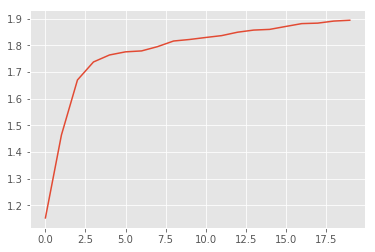

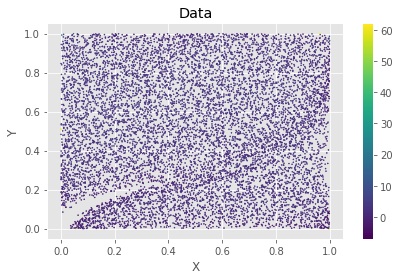

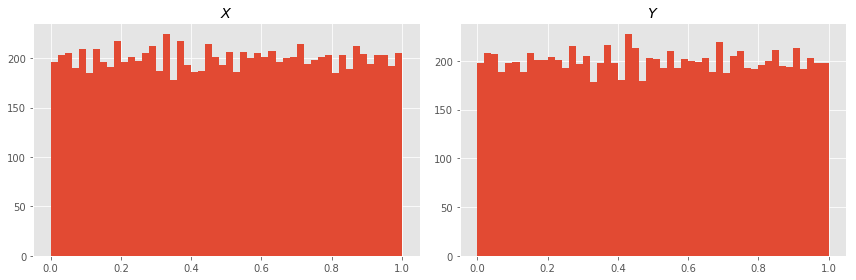

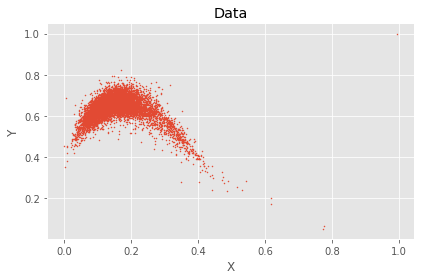

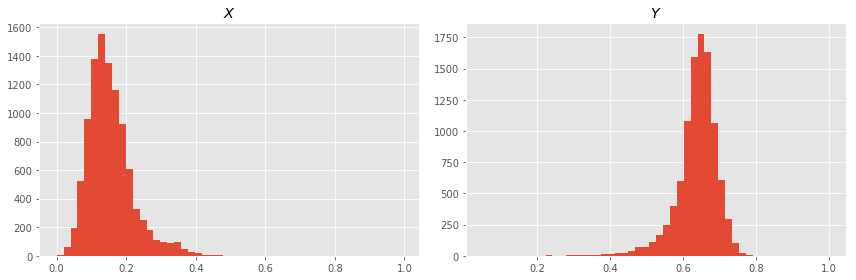

In [51]:
# Get RBIG model
n_layers = 20
bins = 'auto'
bounds = 0.1
alpha = 1e-10
random_state = 123

deep_rbig_cmodel = get_deep_rbig_cmodel(
    n_layers=n_layers,
    bins=bins, alpha=alpha, bounds=bounds,
    random_state=random_state
)

deep_rbig_cmodel.fit(data);



# Get Scores
# data_samples = deep_rbig_model.sample(100, random_state=123)
score = deep_rbig_cmodel.score(data)
score_layers = deep_rbig_cmodel.score_layers(data)
probs = deep_rbig_cmodel.score_samples(data)
print('Score:', score)

plot_layer_scores(score_layers)

# Data in Gaussian Domain
Z_approx = deep_rbig_cmodel.transform(data)

plot_scatter(Z_approx, probs)

plot_histograms(Z_approx)


# Generate Samples in Data Domain
G = np.random.randn(10000, 2)
data_approx = deep_rbig_cmodel.inverse_transform(G)

plot_scatter(data_approx)

plot_histograms(data_approx)

## Cross-Validation

In [25]:
# Get RBIG model
n_layers = 50
bins = 100
bounds = 0.1
alpha = 1e-10
init=True
random_state = 123

args = {
    'cv':3
}


deep_rbig_cvmodel = get_rbig_cvmodel(
    n_layers=n_layers,
    bins=bins, alpha=alpha, bounds=bounds,
    random_state=random_state, init=init, **args
)

deep_rbig_cvmodel.fit(data);


../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: invalid value encountered in double_scalars
  rel_diff = (cur_score - max_previous_scores) / np.abs(
../ddl/deep.py:415: RuntimeWarning: inval

KeyboardInterrupt: 

In [ ]:
# Get Scores
# data_samples = deep_rbig_model.sample(100, random_state=123)
score = deep_rbig_model.score(data)
score_layers = deep_rbig_model.score_layers(data)
probs = deep_rbig_model.score_samples(data)
print('Score:', score)

plot_layer_scores(score_layers)

# Data in Gaussian Domain
Z_approx = deep_rbig_model.transform(data)

plot_scatter(Z_approx, probs)

plot_histograms(Z_approx)


# Generate Samples in Data Domain
U = np.random.randn(10000, 2)
data_approx = deep_rbig_model.inverse_transform(U)

plot_scatter(data_approx)

plot_histograms(data_approx)
